In [1]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
def get_data():
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train,test 

In [4]:
def get_combined_data():
    train , test = get_data()
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index'], inplace=True, axis=1)
    return combined

In [5]:
train_data, test_data = get_data()

In [6]:
Data = get_combined_data()
#list(Data)

In [7]:
# Select some columns to plot
Data = Data[['Vespera','Ferias','tMed','Nday_Monday','Day_D_5','Month_JULY','Year_Y2015','Cardapio_BIFE','Tipo_Almoço','Servidas']]

In [8]:
Data.describe()

,Vespera,Ferias,tMed,Nday_Monday,Day_D_5,Month_JULY,Year_Y2015,Cardapio_BIFE,Tipo_Almoço,Servidas
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000
mean,0.045172,0.222636,22.454061,0.206503,0.035493,0.090097,0.120129,0.117399,0.408786,4325.114669
std,0.207708,0.416067,3.426745,0.404846,0.185044,0.286356,0.325153,0.321935,0.491671,2942.872576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1579.000000
50%,0.000000,0.000000,22.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3741.000000
75%,0.000000,0.000000,25.050000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7207.000000
max,1.000000,1.000000,30.690000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28000.000000


# Data distribution

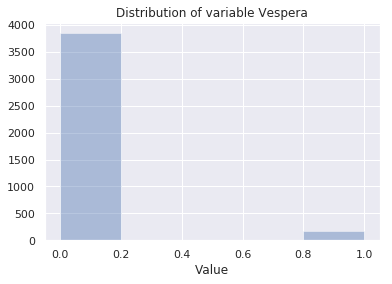

In [9]:
sns.set(color_codes=True)
sns.distplot(Data['Vespera'].values,bins=5,hist=True,kde=False, rug=False,
             axlabel='Value').set_title("Distribution of variable Vespera")
plt.show()

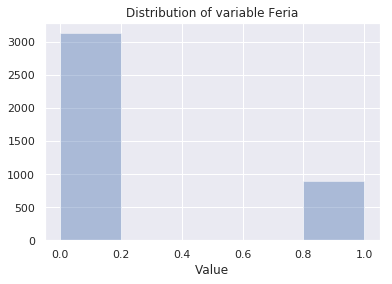

In [10]:
sns.set(color_codes=True)
sns.distplot(Data['Ferias'].values,bins=5,hist=True,kde=False, rug=False,
             axlabel='Value').set_title("Distribution of variable Feria")
plt.show()

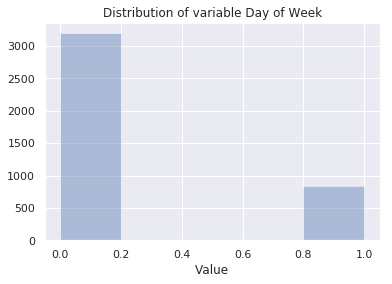

In [11]:
sns.set(color_codes=True)
sns.distplot(Data['Nday_Monday'].values,bins=5,hist=True,kde=False, rug=False,
             axlabel='Value').set_title("Distribution of variable Day of Week")
plt.show()

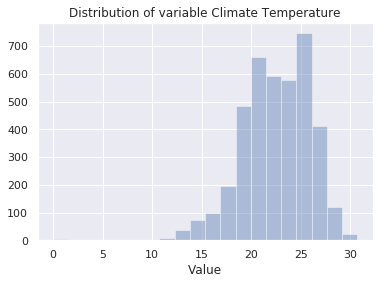

In [12]:
sns.set(color_codes=True)
sns.distplot(Data['tMed'].values,bins=20,hist=True,kde=False, rug=False,
             axlabel='Value').set_title("Distribution of variable Climate Temperature")
plt.show()

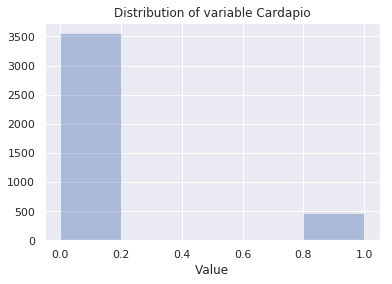

In [13]:
sns.set(color_codes=True)
sns.distplot(Data['Cardapio_BIFE'].values,bins=5,hist=True,kde=False, rug=False,
             axlabel='Value').set_title("Distribution of variable Cardapio")
plt.show()

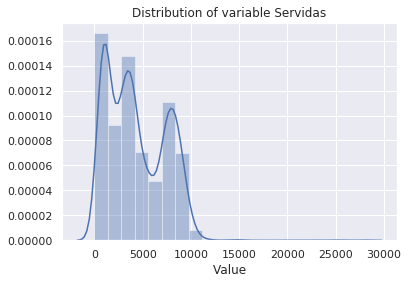

In [14]:
sns.set(color_codes=True)
sns.distplot(Data['Servidas'].values,bins=20,hist=True,kde=True, rug=False,
             axlabel='Value').set_title("Distribution of variable Servidas")
plt.show()

# Correlation between the features

In [15]:
corr = Data.corr()

In [16]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

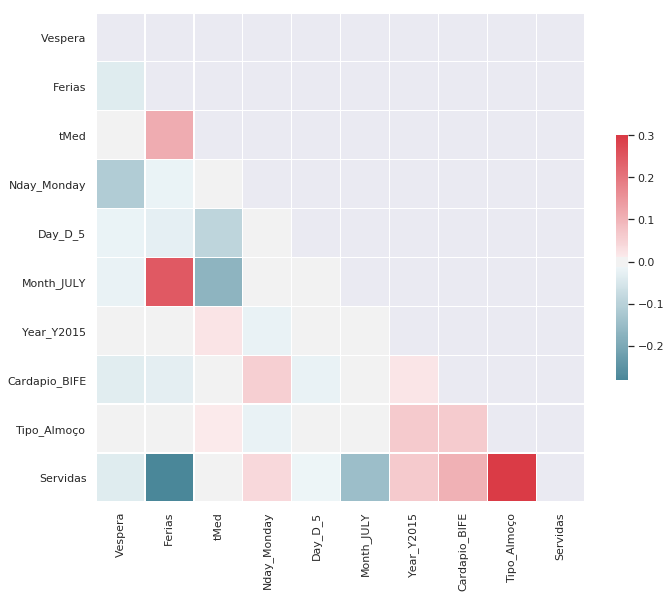

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

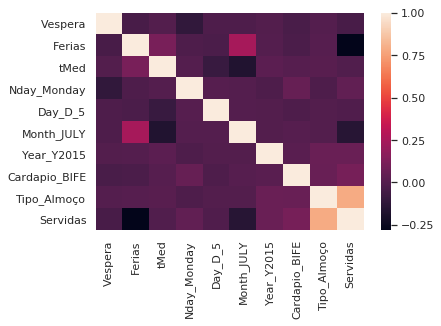

In [18]:
sns.heatmap(corr)
plt.show()

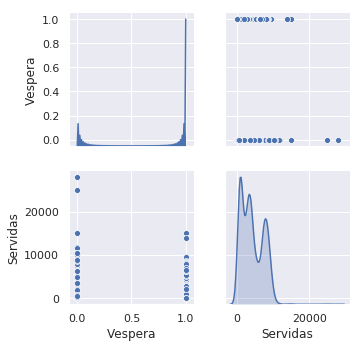

In [19]:
sns.pairplot(Data, diag_kind="kde",vars=["Vespera", "Servidas"])
plt.show()

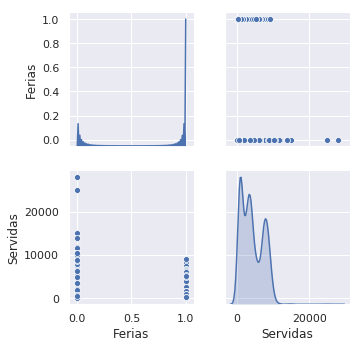

In [20]:
sns.pairplot(Data, diag_kind="kde",vars=["Ferias", "Servidas"])
plt.show()

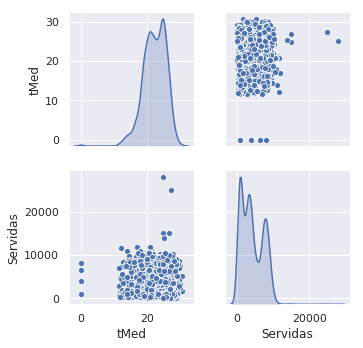

In [21]:
sns.pairplot(Data, diag_kind="kde",vars=["tMed", "Servidas"])
plt.show()

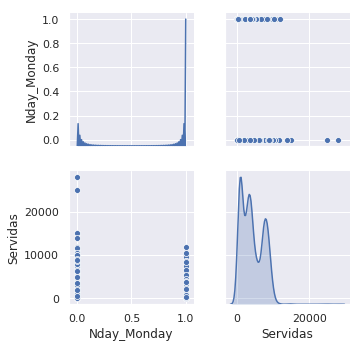

In [22]:
sns.pairplot(Data, diag_kind="kde",vars=["Nday_Monday", "Servidas"])
plt.show()

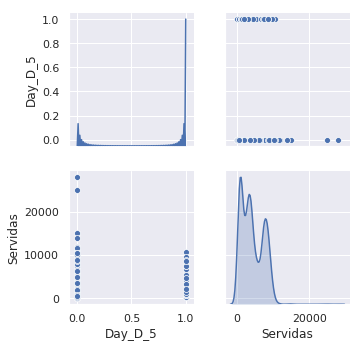

In [23]:
sns.pairplot(Data, diag_kind="kde",vars=["Day_D_5", "Servidas"])
plt.show()

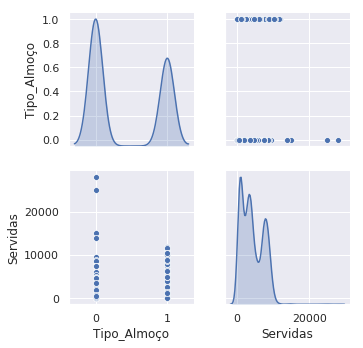

In [24]:
sns.pairplot(Data, diag_kind="kde",vars=["Tipo_Almoço", "Servidas"])
plt.show()

In [31]:
def get_combined_dataTarget():
    #reading train data
    train , test = get_data()
    combined = train.append(test)
    combined_target = combined.Servidas
    combined.drop(['Servidas'],axis = 1 , inplace = True)
    return combined, combined_target

In [62]:
x,y=get_combined_dataTarget()
x = PCA(n_components=1).fit_transform(x)
y=y.reshape((y.shape[0],1))
y=pd.DataFrame(y, columns=['y'])
x=pd.DataFrame(x, columns=['x'])
data= pd.concat([x, y], axis=1)

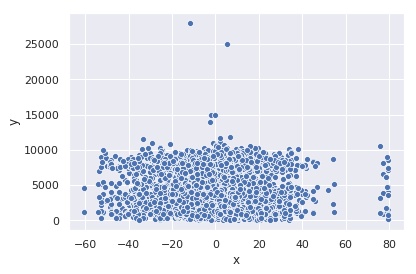

In [64]:
sns.scatterplot(data=data,x="x",y="y")
plt.show()

In [77]:
Data=get_combined_data()
Data = PCA(n_components=2).fit_transform(data)
Data=pd.DataFrame(Data, columns=['P1','P2'])

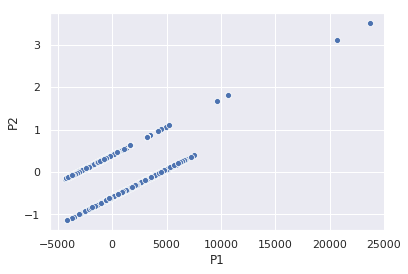

In [78]:
sns.scatterplot(data=Data,x="P1",y="P2")
plt.show()

In [27]:
Data_ = pd.read_csv('BaseDados.csv')
Data_=Data_[Data_['Nday'] != "Saturday"]
Data_=Data_[Data_['Nday'] != "Sunday"]

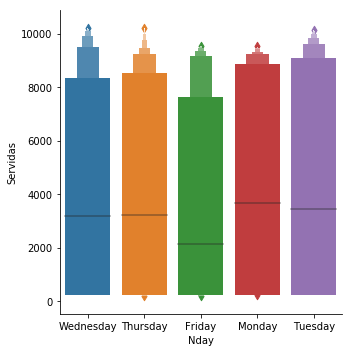

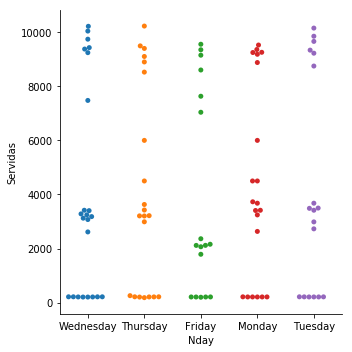

In [28]:
Data=Data_.iloc[100:200]
sns.catplot(x="Nday", y="Servidas", kind="boxen", data=Data)
plt.show()
sns.catplot(x="Nday", y="Servidas", kind="swarm", data=Data)
plt.show()

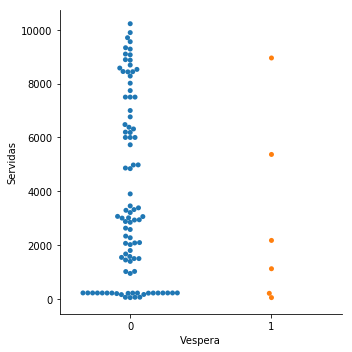

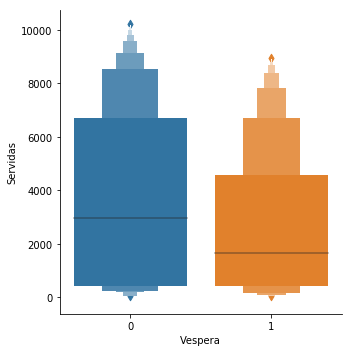

In [29]:
Data=Data_.iloc[1000:1100]
sns.catplot(x="Vespera", y="Servidas", kind="swarm", data=Data)
plt.show()
sns.catplot(x="Vespera", y="Servidas", kind="boxen", data=Data)
plt.show()

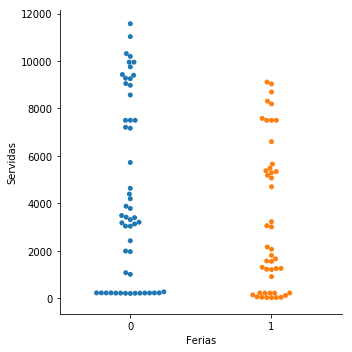

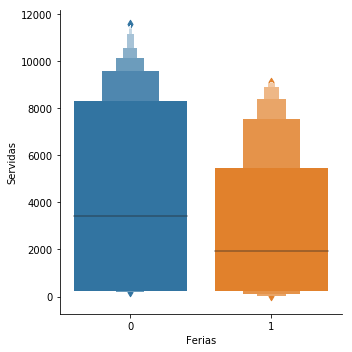

In [30]:
Data=Data_.iloc[1100:1200]
sns.catplot(x="Ferias", y="Servidas", kind="swarm", data=Data)
plt.show()
sns.catplot(x="Ferias", y="Servidas", kind="boxen", data=Data)
plt.show()